
 ## **Assignment 2**




# Question 1

Original Audio Signal


Clean Audio Signal


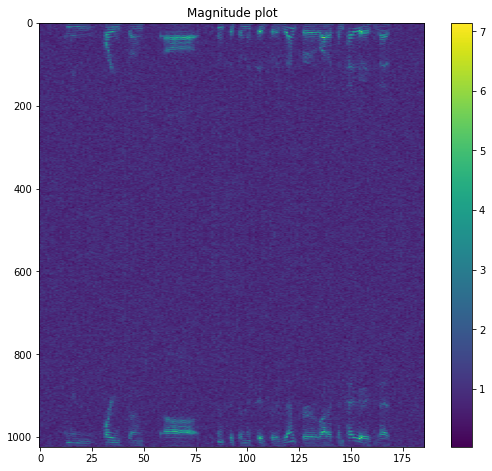

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io.wavfile as wav
import librosa
from IPython.display import Audio


def data_hann(x):
    N = len(x)
    hann_window = signal.windows.hann(N)
    windowed_samples = x * hann_window
    return (windowed_samples)


def F_matrix(N):
    Fr = np.zeros((N, N), dtype=float)
    Fi = np.zeros((N, N), dtype=float)
    for f in range(N):
        for n in range(N):
            angle = 2 * np.pi * f * n / N
            Fr[f][n] = np.cos(angle)
            Fi[f][n] = np.sin(angle)

    return Fr, Fi


def audio_signal(Xn, N):
    Xn_t = np.transpose(Xn)
    row_vector = Xn_t.reshape(1,-1)
    row_vector = row_vector[0]

    N_by_2 = int(N/2)

    my_signal = row_vector[0:N_by_2]

    for i in range (N_by_2,len(row_vector)-N,N):
        vec = row_vector[i:i+N_by_2] + row_vector[i+N_by_2:i+N]
        my_signal = np.concatenate((my_signal, vec))

    my_signal = np.concatenate((my_signal, row_vector[-N_by_2:]))

    return my_signal


if __name__ == '__main__':
    data, sr = librosa.load('/content/x.wav', sr=None)
    N = 1024

    Fr, Fi = F_matrix(N)
    F = Fr - 1j * Fi
    F_star = Fr + 1j * Fi

    I = np.matmul(F, F_star) / N

    X = []

    for i in range(0, len(data) - N, int(N / 2)):
        N_samples = data[i:i + N]
        X.append(data_hann(N_samples))

    X = np.array((X))
    X = np.transpose(X)

    Y = np.matmul(F, X)
    magnitude_Y = np.abs(Y)

    # Identified white noise columns from 170 to 186
    # that is the last 16 columns
    
    M = magnitude_Y[:,170:] 
    M = M.sum(axis=1) / len(M[0])
    M = M.reshape(-1, 1)

    suppresed_magnt = magnitude_Y - M
    suppresed_magnt = np.maximum(suppresed_magnt, 0)

    phase_Y = Y / magnitude_Y

    clean_Y = phase_Y * suppresed_magnt

    magnitude_clean_Y = np.abs(clean_Y)

    Xn = (np.matmul(F_star, clean_Y)) / N
    Xn_real = np.real(Xn)

    my_signal = audio_signal(Xn_real, N)
    
    print("Original Audio Signal")
    display(Audio(data=data, rate=sr))

    print("Clean Audio Signal")
    display(Audio(data=my_signal, rate=sr))

    plt.figure(figsize=(9.4, 7.8))
    plt.imshow(magnitude_Y ** 0.5, aspect=0.2)
    plt.title("Magnitude plot")
    plt.colorbar()

    plt.show()


# Question 2

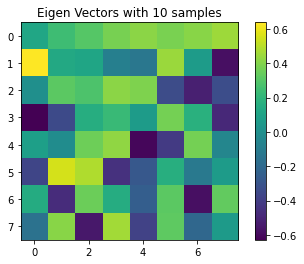

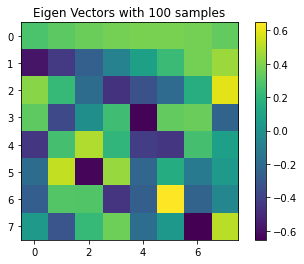

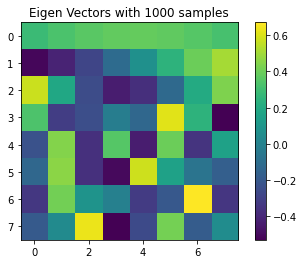

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa


def X_eigenvector(N):
    start_index = np.random.randint(0, len(data)-9)
    X = data[start_index:start_index+8]
    X = X.reshape(-1, 1)

    for i in range(N-1):
        start_index = np.random.randint(0, len(data) - 9)
        column_vector = data[start_index:start_index + 8]
        column_vector = column_vector.reshape(-1, 1)
        X = np.concatenate((X, column_vector), axis=1)

    X_Cov = np.cov(X, bias=True)
    eigenvalues, eigenvectors = np.linalg.eig(X_Cov)

    return eigenvectors


if __name__ == '__main__':
    data, sr = librosa.load('/content/s.wav', sr=None)

    X1 = X_eigenvector(10)
    X1 = np.transpose(X1)
    X2 = X_eigenvector(100)
    X2 = np.transpose(X2)
    X3 = X_eigenvector(1000)
    X3 = np.transpose(X3)

    plt.figure()
    plt.imshow(X1)
    plt.title("Eigen Vectors with 10 samples")
    plt.colorbar()

    plt.figure()
    plt.imshow(X2)
    plt.title("Eigen Vectors with 100 samples")
    plt.colorbar()

    plt.figure()
    plt.imshow(X3)
    plt.title("Eigen Vectors with 1000 samples")
    plt.colorbar()

    plt.show()


The plot obtained from PCA is similar to DCT matrix. 

# **DCT:**

The DCT is a mathematical transform that converts a signal or image from the time or spatial domain to the frequency domain. It used to represent the data in terms of its most important frequency components. The DCT matrix is a matrix that is used to perform the DCT operation.

# **PCA:**

Contrarily, Principal Component Analysis (PCA) entails calculating the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors of the covariance matrix represent the directions in which the data varies the most. PCA can be used to reduce the dimensionality of the data by projecting it onto the most important principal components.

#**Relatoinship between PCA and DCT:**

The relationship between the DCT matrix and PCA lies in the fact that  both represent a set of basis vectors that can be used to describe a dataset.

Specifically, the DCT matrix is a set of orthogonal basis vectors that can be used to represent a signal or image in terms of its frequency components. In this sense, the DCT matrix is similar to the eigenvectors of the covariance matrix used in PCA, since both represent a set of basis vectors that can be used to describe a dataset.

Therefore, the DCT matrix and PCA can be seen as related techniques, with the DCT matrix providing a basis for the principal components used in PCA.

#**Pros and Cons of DCT:**
**Pros**

1. DCT is a lossy compression technique that can be used to compress data with minimal loss of information.
2. DCT is computationally efficient
3. DCT is a linear transformation, which means that it can be easily implemented using standard linear algebra operations.

**Cons**

1. DCT is not suitable for data that contains sharp edges or rapid changes in intensity, since it tends to introduce blocky artifacts in these areas..
2. DCT can be sensitive to noise in the data, which can affect the quality of the compressed signal or image.

#**Pros and Cons of PCA:**
**Pros**
1. PCA reduce the size of high-dimensional datasets while retaining most of the important information. This makes it useful for applications such as image and speech recognition.

2. PCA can be used to identify patterns and correlations in the data that may not be immediately apparent from visual inspection.

3. PCA is a versatile technique that can be used with a wide variety of data types, including numerical and categorical data.

**Cons**
1. PCA is a linear technique, which may not be effective for identifying complex nonlinear relationships in the data.
2. PCA is sensitive to outliers in the data, which can affect the accuracy of the results.
3. The interpretation of the principal components generated by PCA can be difficult, since they are often a linear combination of many variables in the original dataset.


# Question 3

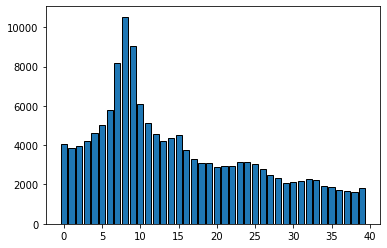

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

if __name__ == "__main__":
    XL = plt.imread('/content/im0.ppm')
    XR = plt.imread('/content/im8.ppm')

    min_diff = []
    D_map = np.zeros((381, 390), dtype=int)

    i_limit = len(XR)
    j_limit = len(XR[0]) -40
    for i in range(i_limit):
        for j in range(j_limit):
            for k in range(j, j+40, 1):
                temp1 = (XL[i][k])
                temp = XL[i][k] - XR[i][j]
                temp = abs(temp)
                temp = sum(temp)
                min_diff.append(temp)

            value = min(min_diff)
            index = min_diff.index(value)
            min_diff = []
            D_map[i][j] = index

    vector_D_Map = D_map.reshape(1, -1)

    # Saving disparity map for Question 4 
    np.savetxt('vector.txt', vector_D_Map)
    # Ploting histograms
    unique_values, frequencies = np.unique(vector_D_Map, return_counts=True)
    plt.bar(unique_values, frequencies, edgecolor='black')
    plt.show()



For the histogram I can see there are almost 4 bumbsa as shown in the figure below. Hence I assume my disparity map is composed of mixture of 4 guassian distributions. Hence, I have 4 cluster

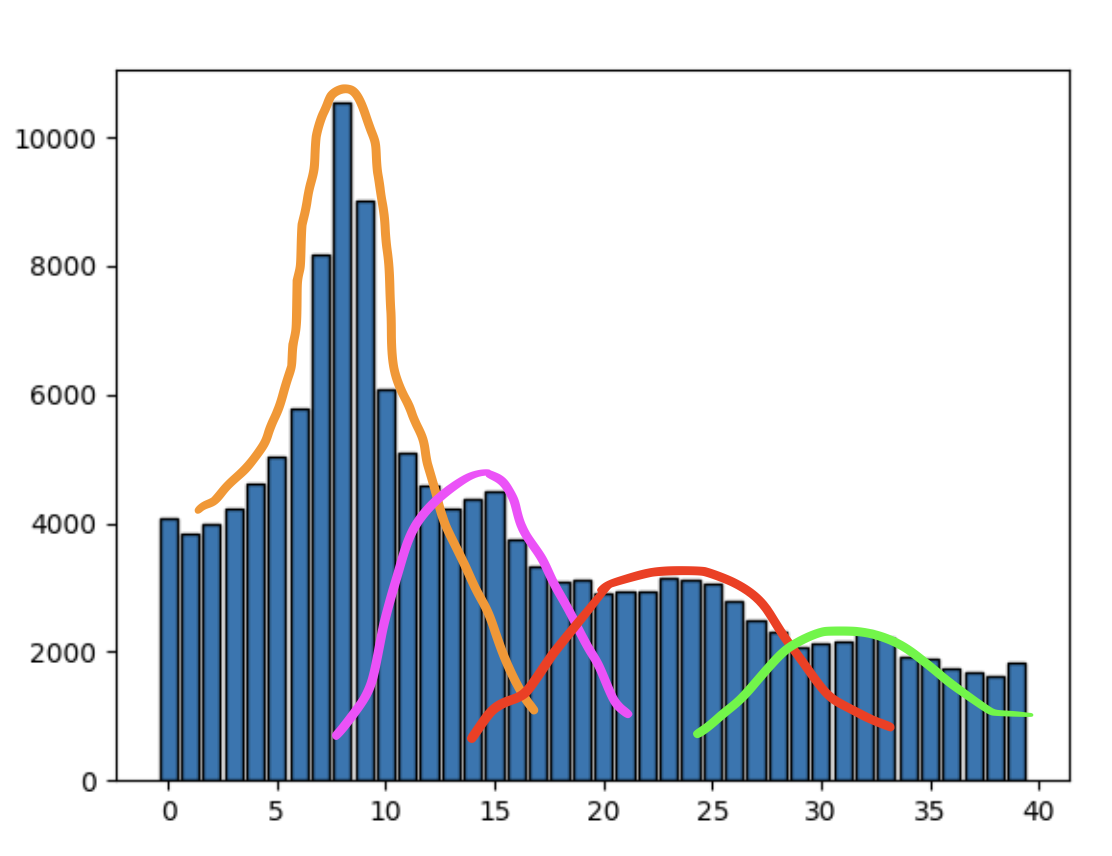

# Question 4(a)

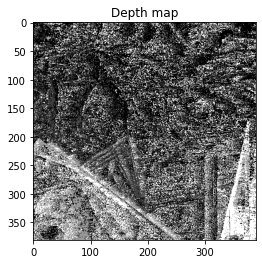

In [7]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == "__main__":

    # loading the disparity map obtained in Question 3
    vector_D_Map = np.loadtxt('vector.txt')
    # Number of cluster = 4
    k = 4
    # Mean initialization by grouping the data into 4 parts 
    # and taking the mean of each group
    groups = np.split(vector_D_Map[:148588], k)
    means = [group.mean() for group in groups]
    theta = np.array(means)
    theta = theta.reshape(-1, 1)

    theta_previous = np.zeros((4, 1))

    theta - theta_previous

    tol = 1e-5
    max_iter = 1000
    distortions = np.zeros(max_iter)

    for iteration in range(max_iter):
        # create the assignment matrix U based on the theta
        diff = (theta - vector_D_Map) ** 2
        min_indexes = np.argmin(diff, axis=0)
        U = np.zeros_like(diff)
        U[min_indexes, np.arange(U.shape[1])] = 1

        # check for convergence

        distortions[iteration] = np.sum(np.abs(theta - theta_previous))

        if iteration > 0 and np.abs(distortions[iteration] - distortions[iteration - 1]) < tol:
            break

        # update the means (theta)
        summation = np.matmul(U, vector_D_Map.reshape(-1, 1))
        num_ones = np.count_nonzero(U, axis=1)
        num_ones = num_ones.reshape(-1, 1)
        theta_previous = theta
        theta = summation / num_ones

    #generating image by replacing each element of image
    # by the mean of its cluster
    row1 = np.array([])

    for i in range(len(U[0])):
        temp = np.array(np.where(U[:, i] == 1)[0])
        row1 = np.concatenate((row1, temp))

    zero_indices = np.where(row1 == 0)
    first_indices = np.where(row1 == 1)
    second_indices = np.where(row1 == 2)
    third_indices = np.where(row1 == 3)

    D_map_new = np.zeros(148590)
    D_map_new[zero_indices] = theta[0]
    D_map_new[first_indices] = theta[1]
    D_map_new[second_indices] = theta[2]
    D_map_new[third_indices] = theta[3]

    D_map_new = D_map_new.reshape(381, 390)
    plt.imshow(D_map_new, cmap='gray')
    plt.title("Depth map")
    plt.show()


# Question 4(b)

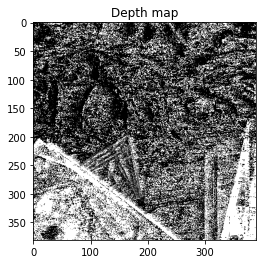

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt


def normal_pdf(x, mu, sigma):
    pdf = 1 / (sigma * math.sqrt(2 * math.pi)) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    return pdf


if __name__ == "__main__":
    
    # loading the disparity map obtained in Question 3
    X = np.loadtxt('/content/vector.txt')
    X1 = X.reshape(-1, 1)

    k = 4
    P = np.array(np.ones(k) / k)
    # Mean initialization by grouping the data into 4 parts 
    # and taking the mean of each group
    groups = np.split(X[:148588], k)
    means = [group.mean() for group in groups]
    mu = np.array(means)

    sigma = np.ones(k)

    tol = 1e-6
    max_iter = 1000
    log_likelihoods = []

    for iteration in range(max_iter):
        # E-step: compute responsibilities
        U_t = np.zeros((k, len(X)))
        for i in range(k):
            U_t[i] = normal_pdf(X, mu[i], sigma[i])
        U = np.transpose(U_t)
        P_diag = diagonal_matrix = np.diag(np.squeeze(P))
        U = U_log = np.matmul(U, P_diag)
        for j in range(len(X)):
            U[j] /= np.sum(U[j])

        # M-step: update parameters
        U_sum = np.sum(U, axis=0)
        P = U_sum / len(X)
        for k1 in range(k):
            mu[k1] = np.sum(U[:, k1]*X)/U_sum[k1]
            sigma[k1] = np.sqrt(np.sum(U[:, k1] * (X - mu[k1]) ** 2) / U_sum[k1])

        # Compute log-likelihood to check convergence 
        log_likelihood = np.sum(np.log(np.sum(U_log)))
        log_likelihoods.append(log_likelihood)

        # Check for convergence
        if iteration > 0 and np.abs(log_likelihood - log_likelihoods[-2]) < tol:
            break

    # generating image by replacing each element of image
    # by the mean of its distribution

    max_indexes = np.argmax(U, axis=1)

    zero_indices = np.where(max_indexes == 0)
    first_indices = np.where(max_indexes == 1)
    second_indices = np.where(max_indexes == 2)
    third_indices = np.where(max_indexes == 3)

    D_map_new = np.zeros(148590)
    D_map_new[zero_indices] = mu[0]
    D_map_new[first_indices] = mu[1]
    D_map_new[second_indices] = mu[2]
    D_map_new[third_indices] = mu[3]

    D_map_new = D_map_new.reshape(381, 390)
    plt.imshow(D_map_new, cmap='gray')
    plt.title("Depth map")
    plt.show()
